# Task 1- Exploring  Supervised Machine Learning

In this task we will predict the percentage of marks that a student is expected to score based upon the number of hours he studied. This is a simple linear regression as it involves just two variables.

# Importing the required libraries:

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error , r2_score

# Dataset

In [5]:
data_set="http://bit.ly/w-data "
df=pd.read_csv(data_set)
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Finding if the data contains any null value or not

In [6]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

In [7]:
df.shape

(25, 2)

In [8]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Visualizing the Data

<Figure size 720x360 with 0 Axes>

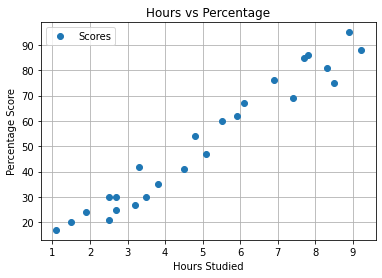

In [13]:
plt.figure(figsize=(10,5))
df.plot(x='Hours', y='Scores' , style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

from the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

# Preparing the data for training

In [18]:
x=df.iloc[:,:-1].values
y=df.iloc[:,1].values

In [19]:
x_train , x_test ,y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=0)
print("Spliting the data complete")

Spliting the data complete


# Fitting the model for prediction

In [20]:
linear_model=LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

# Potting the regression line

Slope: [9.91065648]
Intercept: 2.018160041434683


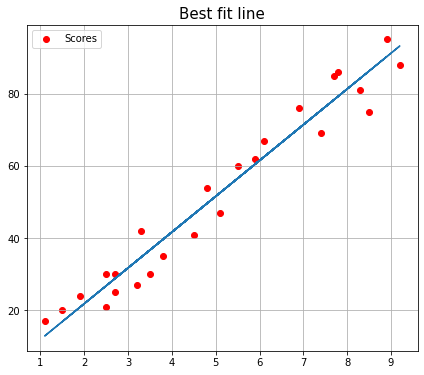

In [25]:
slope=linear_model.coef_
intercept=linear_model.intercept_

print('Slope:', slope)
print('Intercept:', intercept)

line=slope*x+intercept

plt.figure(figsize=(7,6))
plt.scatter(x,y, color='red', label='Scores')
plt.plot(x,line)
plt.title('Best fit line', Size=15)
plt.legend()
plt.grid(True)
plt.show()

# Making Prediction

In [26]:
print(x_test)  #Testing data 
y_pred=linear_model.predict(x_test)
print(y_pred)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


# Actual vs Predicted

In [27]:
df=pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


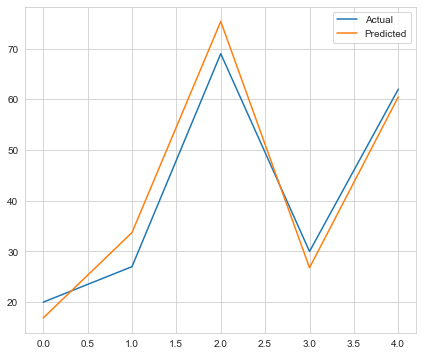

In [28]:
sns.set_style('whitegrid')
df.plot(kind='line' ,figsize=(7,6))

# Testing with new data

In [31]:
hours=[[9.25]]
own_pred=linear_model.predict(hours)

print("No of Hours= {}".format(hours))
print("Predicted percentage={}%".format(own_pred))

No of Hours= [[9.25]]
Predicted percentage=[93.69173249]%


# Evaluating the model

In [35]:
mae=mean_absolute_error(y_pred, y_test)
mse=mean_squared_error(y_pred, y_test)
r_score=r2_score(y_pred, y_test)
rmse=np.sqrt(mse)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-Squared:', r_score)

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
R-Squared: 0.9546785947197246


# Made by Dipannita Pal